[nltk_data] Downloading package stopwords to /Users/Nel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


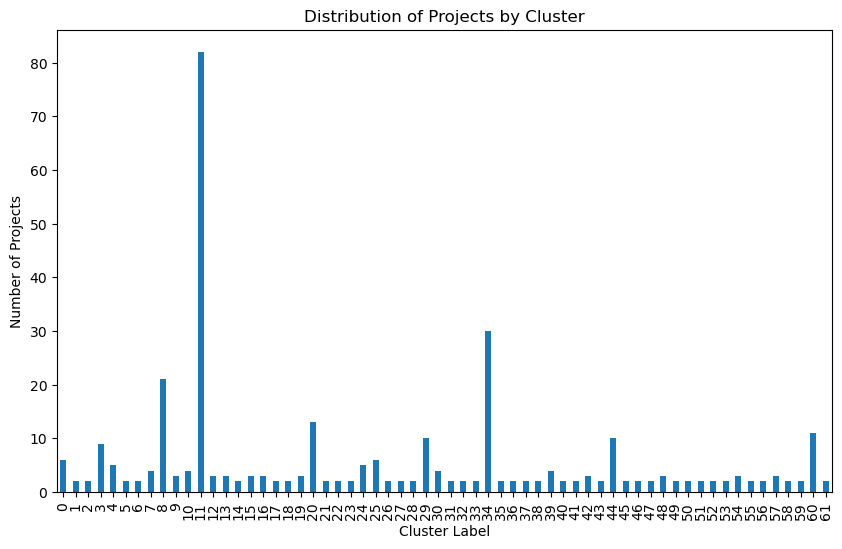

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

# Load the clustered data
df = pd.read_csv('record_level_information_FedAI_2023_clustered.csv')

# Plot cluster distribution
plt.figure(figsize=(10, 6))
df[df['cluster_label'] != -1]['cluster_label'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Projects')
plt.title('Distribution of Projects by Cluster')
plt.show()


In [91]:
custom_stopwords = {'<title>', '</title>', '<description>', '</description>'}
stop_words.update(custom_stopwords)

# Show top words for each cluster
for cluster in df['cluster_label'].unique():
    if cluster == -1:  # Skip noise
        continue
    cluster_text = ' '.join(df[df['cluster_label'] == cluster]['combined_text'].tolist())

    words = [word.lower() for word in cluster_text.split() if word.lower() not in stop_words]
    word_counts = Counter(words).most_common(3)

    print(f"Top words in Cluster {cluster}:")
    for word, count in word_counts:
        print(f"{word}: {count}")
    print("\n")


Top words in Cluster 0:
detection: 11
autonomous: 8
awareness: 6


Top words in Cluster 1:
video: 8
detection: 5
computer: 5


Top words in Cluster 2:
data: 6
entity: 6
resolution: 5


Top words in Cluster 3:
data: 15
analysts: 12
information: 11


Top words in Cluster 4:
pii: 10
indicator: 9
ais: 6


Top words in Cluster 5:
malware: 5
reverse: 3
engineering: 3


Top words in Cluster 6:
email: 4
spam: 3
analytics: 2


Top words in Cluster 7:
model: 11
data: 10
identity: 9


Top words in Cluster 8:
chatbot: 20
virtual: 11
questions: 10


Top words in Cluster 9:
acoustic: 8
passive: 5
detection: 5


Top words in Cluster 10:
automated: 6
develop: 5
image: 5


Top words in Cluster 11:
data: 104
learning: 62
machine: 51


Top words in Cluster 12:
land: 10
cover: 8
change: 5


Top words in Cluster 13:
coral: 8
reef: 5
operational: 3


Top words in Cluster 14:
sea: 6
steller: 5
lion: 4


Top words in Cluster 15:
patent: 5
classification: 5
system: 4


Top words in Cluster 16:
machine: 4
learn

In [92]:
# Group by cluster and find unique department codes within each cluster
multi_dept_clusters = df[df['cluster_label'] != -1].groupby('cluster_label')['Department_Code'].nunique()

# Filter for clusters with more than one department
multi_dept_clusters = multi_dept_clusters[multi_dept_clusters > 1]

# Print the results
print("Clusters with projects from more than one department:")
for cluster, num_departments in multi_dept_clusters.items():
    print(f"Cluster {cluster} has projects from {num_departments} different departments.")

# display a subset of projects in these clusters
for cluster in multi_dept_clusters.index:
    print(f"\nSample projects from Cluster {cluster}:")
    print(df[df['cluster_label'] == cluster][['Title', 'Department_Code']].head())


Clusters with projects from more than one department:
Cluster 0 has projects from 2 different departments.
Cluster 3 has projects from 2 different departments.
Cluster 4 has projects from 3 different departments.
Cluster 5 has projects from 2 different departments.
Cluster 6 has projects from 2 different departments.
Cluster 8 has projects from 9 different departments.
Cluster 10 has projects from 2 different departments.
Cluster 11 has projects from 6 different departments.
Cluster 12 has projects from 2 different departments.
Cluster 13 has projects from 2 different departments.
Cluster 29 has projects from 6 different departments.
Cluster 32 has projects from 2 different departments.
Cluster 33 has projects from 2 different departments.
Cluster 34 has projects from 4 different departments.
Cluster 36 has projects from 2 different departments.
Cluster 43 has projects from 2 different departments.
Cluster 44 has projects from 2 different departments.
Cluster 48 has projects from 2 dif

In [93]:
df[df['cluster_label'] != -1].sort_values(by='cluster_label')

,Use_Case_ID,Department_Code,Agency,Office,Title,Summary,Development_Stage,Techniques,Source_Code,Department,combined_text,cluster_label
1,DHS-0001-2023,DHS,Customs and Border Protection,NaN,AI for Autonomous Situational Awareness,The AI for autonomous situational awareness sy...,Development and Acquisition,Machine Vision,NaN,Department of Homeland Security,<title> AI for Autonomous Situational Awarenes...,0
4,DHS-0004-2023,DHS,Customs and Border Protection,NaN,Autonomous Maritime Awareness,The Autonomous Maritime Awareness system combi...,Development and Acquisition,Machine Learning Automation & Robotics,NaN,Department of Homeland Security,<title> Autonomous Maritime Awareness </title>...,0
12,DHS-0012-2023,DHS,Customs and Border Protection,NaN,Vessel Detection,Integrated technologies and analytics enhance ...,Development and Acquisition,Machine Vision,NaN,Department of Homeland Security,<title> Vessel Detection </title> <description...,0
574,NASA-0022-2023,NASA,Marshall Space Flight Center,NaN,Airplane detection,Deep learning-based airplane detection from hi...,In-use,NaN,NaN,National Aeronautics and Space Administration,<title> Airplane detection </title> <descripti...,0
563,NASA-0011-2023,NASA,Jet Propulsion Laboratory,NaN,"Autonomous Marine Vehicles (Single, Multiple)",Due to the communication paradigm associated w...,In mission,constraint-based heuristic Search,NaN,National Aeronautics and Space Administration,"<title> Autonomous Marine Vehicles (Single, Mu...",0
...,...,...,...,...,...,...,...,...,...,...,...,...
682,VA-0012-2023,VA,NaN,NaN,Machine learning tools to predict outcomes of ...,This is an IRB-approved study which aims to ex...,NaN,NaN,NaN,Department of Veterans Affairs,<title> Machine learning tools to predict outc...,60
671,VA-0001-2023,VA,NaN,NaN,Artificial intelligence coach in cardiac surgery,The artificial intelligence coach in cardiac s...,NaN,NaN,NaN,Department of Veterans Affairs,<title> Artificial intelligence coach in cardi...,60
698,VA-0028-2023,VA,NaN,NaN,Predicting hospitalization and corticosteroid ...,"This work examines data from 20,368 Veterans H...",NaN,NaN,NaN,Department of Veterans Affairs,<title> Predicting hospitalization and cortico...,60
675,VA-0005-2023,VA,NaN,NaN,Automated eye movement analysis and diagnostic...,Artificial intelligence recursively analyzes ...,NaN,NaN,NaN,Department of Veterans Affairs,<title> Automated eye movement analysis and di...,61


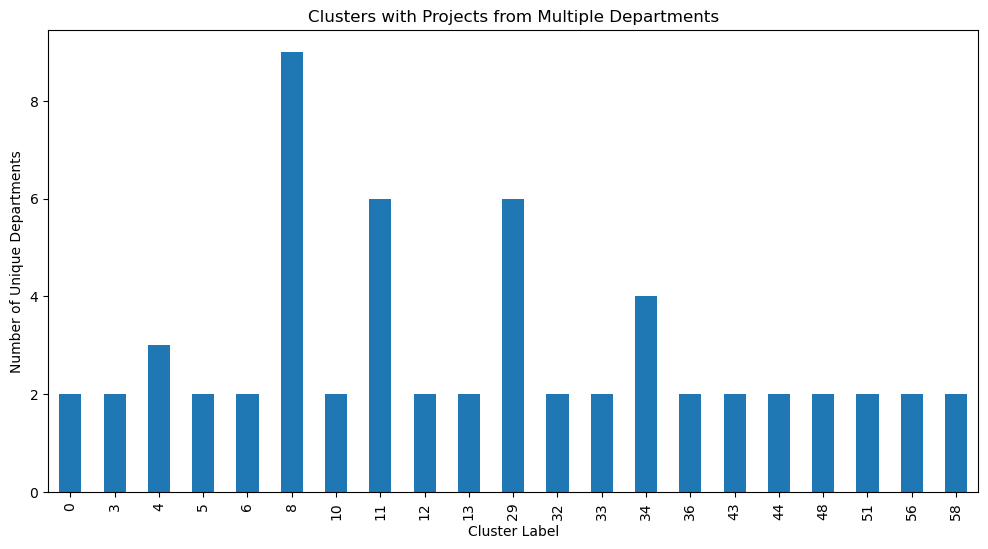

In [94]:
# Plot the number of unique departments in each cluster
plt.figure(figsize=(12, 6))
multi_dept_clusters.plot(kind='bar')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Unique Departments')
plt.title('Clusters with Projects from Multiple Departments')
plt.show()


In [95]:
df[df['cluster_label'] == 8][['Title', 'Summary']]

,Title,Summary
42,Chatbot Pilot,Chatbot embedded into trade.gov to assist ITA ...
46,Azure Chatbot,Azure Chatbot is being leveraged to automate a...
253,AI-Based Chat Bot,The OCIO EITS Service Desk is exploring the ab...
315,Website Chatbot Assistant,The chatbot helps the end user with basic info...
318,DOL Intranet Website Chatbot Assistant,Conversational chatbot on DOL intranet website...
330,Tailored Integration Logistics Management Syst...,A/LM plans to use available ILMS transactional...
332,Tailored Integration Logistics Management Syst...,ILMS developed and deployed an automated suppo...
339,ServiceNow AI-Powered Virtual Agent (Chatbot),IRM’s BMP Systems is planning to incorporate S...
373,Aidan Chat-bot,FSA's virtual assistant uses natural language ...
382,Chatbot for Federal Acquisition Community,The introduction of a chatbot will enable the ...


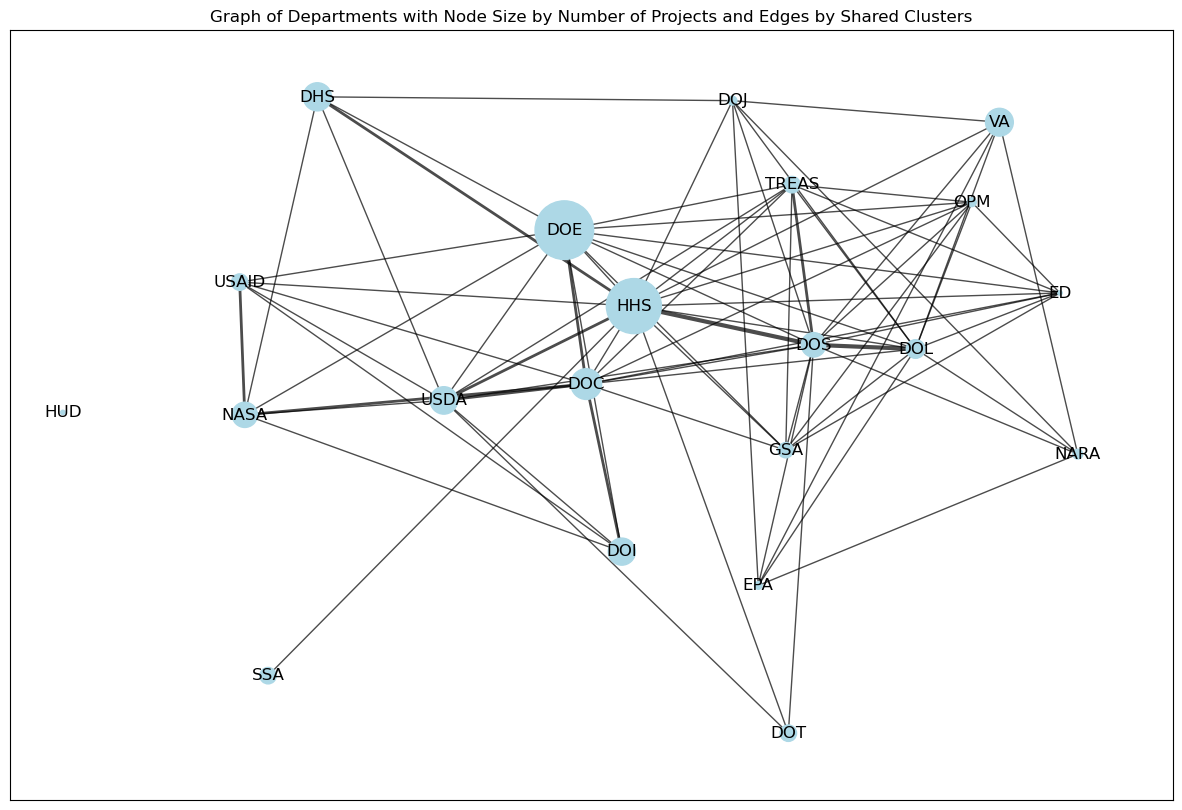

In [96]:
# Step 1: Calculate the number of projects for each department (node size)
department_project_counts = df['Department_Code'].value_counts()

# Step 2: Create a dictionary to store department co-occurrences by cluster (edge weights)
department_pairs = {}

# Iterate through each cluster, excluding the noise cluster (-1) when finding edges
for cluster in df['cluster_label'].unique():
    if cluster == -1:
        continue  # Skip noise cluster for edge calculation
    
    departments_in_cluster = df[df['cluster_label'] == cluster]['Department_Code'].unique()
    for i in range(len(departments_in_cluster)):
        for j in range(i + 1, len(departments_in_cluster)):
            pair = tuple(sorted([departments_in_cluster[i], departments_in_cluster[j]]))
            if pair not in department_pairs:
                department_pairs[pair] = 0
            department_pairs[pair] += 1

# Step 3: Create the graph
G = nx.Graph()

# Add nodes with size based on the number of projects
for department, count in department_project_counts.items():
    G.add_node(department, size=count)

# Add edges with weight based on shared clusters
for (dept1, dept2), weight in department_pairs.items():
    G.add_edge(dept1, dept2, weight=weight)

# Step 4: Draw the graph
plt.figure(figsize=(15, 10))

# Use spring_layout with an adjusted 'k' parameter for more even spacing
pos = nx.spring_layout(G, seed=42, k=1.5)  # Increase 'k' for more space between nodes

# Alternative layout (optional): Uncomment the line below to try kamada_kawai_layout
# pos = nx.kamada_kawai_layout(G)

# Draw nodes with varying sizes
node_sizes = [G.nodes[node]['size'] * 10 for node in G.nodes]  # Scale node size for better visibility
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue')

# Draw edges with varying thickness based on weight
edges = G.edges(data=True)
nx.draw_networkx_edges(
    G, pos, edgelist=edges,
    width=[data['weight'] for (u, v, data) in edges],
    alpha=0.7
)

# Draw labels for nodes
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

plt.title("Graph of Departments with Node Size by Number of Projects and Edges by Shared Clusters")
plt.show()


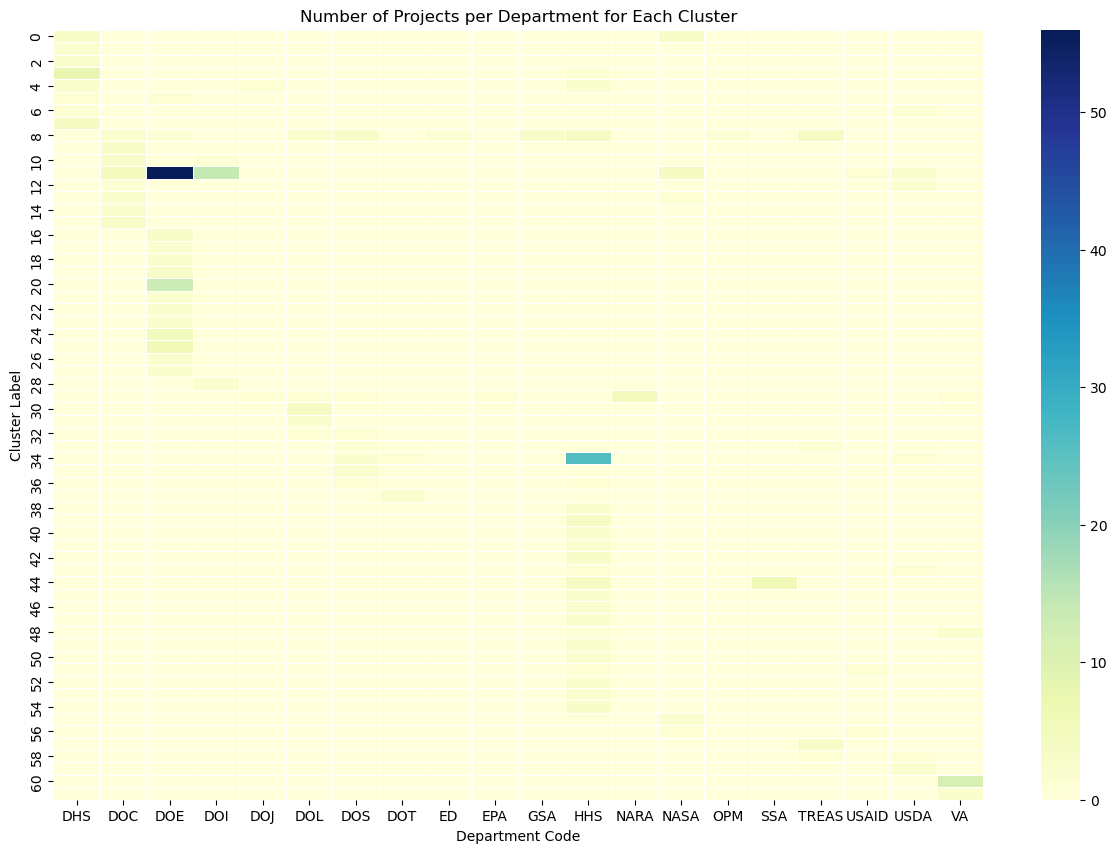

In [ ]:
# Filter out noise clusters if necessary
df = df[df['cluster_label'] != -1]

# Create a pivot table for the number of projects per department for each cluster
pivot_table = df.pivot_table(
    index='cluster_label',
    columns='Department_Code',
    aggfunc='size',  # Counts the number of occurrences
    fill_value=0     # Fills empty cells with 0
)

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, annot=False, fmt='d', cmap='YlGnBu', linewidths=0.5)

# Set the plot labels and title
plt.xlabel('Department Code')
plt.ylabel('Cluster Label')
plt.title('Number of Projects per Department for Each Cluster')
plt.show()
